<a href="https://colab.research.google.com/github/paulardz1/Ciencia-de-Datos/blob/main/PrimeraEntrega_Rodriguez_Abramzon_Farigliano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sexta Presentación** \\
* **Rodriguez**, Maria Paula \\
* **Abramzon**, Mariano \\
* **Farigliano**, Lucas Martin

Importamos la libreria pandas y numpy, para poder leer el dataset y trabajar con él

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics


# Objetivo

El objetivo del siguiente proyecto es, mediante la utilizacion de diferentes algoritmos, ofrecer la mejor experiencia al usuario de la plataforma Netflix.

> Nos basaremos en sus gustos para proponerles recomendaciones.

# Abstract 

Los sistemas de recomendación, son algoritmos que intentan predecir distintos artículos que un usuario en particular podría desear, estos hacen parte de las herramientas más utilizadas y conocidas en el Machine Learning, ya que en la mayoría de aplicaciones en internet, los utilizan para aconsejar y sugerir distintos productos.

Anteriormente, comúnmente, las aplicaciones utilizaban Rankings, o listas de los mas votados, para sugerir a otros usuarios. Esto implica que a todos se les sugería el mismo listado sin realizar ninguna distinción, hoy en día, aun se sigue utilizando esta técnica, pero es posible mejorarla según el gusto e historial de cada persona y de esta forma brindarle mas comodidad y gusto al usuario dentro de la app. 

Los Sistemas de Recomendación intentan personalizar al máximo lo que ofrecerán a cada usuario. Esto es posible por la cantidad de información individual que podemos recabar de las personas y nos da la posibilidad de tener una mejor tasa de aciertos, mejorando la experiencia del internauta sin ofrecer productos a ciegas.

Por ejemplo, el sistema de recomendación de Netflix brinda recomendaciones de películas similares a las que el usuario ya ha visto en el pasado, y además contiene un filtrado de contenido colaborativo que brinda recomendaciones respecto al historial de visualización de otros usuarios con preferencias similares.
 
Hay dos tipos de sistemas de recomendación: el sistema de recomendación basado en contenido y la recomendación de filtrado colaborativo. Con el paso del tiempo y en el trascurso del curso se definirá el método a utilizar para este proyecto.


**La intencion del siguiente proyecto es proveerle al usuario una excelente experiencia al utilizar la plataforma.**


Para la realización de este proyecto, nos permitimos plantearnos las siguientes preguntas: 

¿Cómo es el comportamiento de distintas películas según sus países de origen? 
 
¿Existe alguna relación entre la duración de las películas y los votos obtenidos en cada una de ellas? 

¿Cuál es la variación del puntaje de las películas según su año de lanzamiento en el Reino Unido? 

¿Cómo ha evolucionado la calidad de las películas producidas en Francia con el paso de los años?

¿Cuáles son los géneros de películas con mayor puntuación a lo largo de los años?

entre otras


# Carga y análisis preliminal del DataSet

In [ ]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQ55uxWfRDvMbwC6j1ZDvwaf_Ka7V5OM_cLSNYnUnnSQ-Y2ZUxeGgVYv_nGMoaFBsMXfVr3-96CGXfq/pub?gid=969514038&single=true&output=csv'
df_netflix= pd.read_csv(url,sep=',')
df_netflix.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Presentación de los NaN del DataSet

In [ ]:
df_netflix.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

## **Las columnas que presenta el archivo son:**

* name:       Nombre    
* rating:     Clasificación   
* genre:      Genero   
* year:       Año          
* released:   Fecha y lugar de publicación   
* score:      Puntaje    
* votes:      Votos   
* director:   Director    
* writer:     Escritor    
* star:       Estrella    
* country:    Pais    
* budget:     Presupuesto 
* gross:      Ganancias  
* company:    Compania   
* runtime:    Duración     

## Tamaño del data set

In [ ]:
print(df_netflix.shape)

(7668, 15)


# Análisis Exploratorio de Datos (EDA)

## Funciones para los gráficos

In [ ]:
# Selección del data set con mas elemento de una columna
def Data_importante(data,columna,cantidad):
    data_sumada=data[columna].value_counts()
    index=data_sumada.head(cantidad).index
    resultado=pd.DataFrame()
    for col in index:
      dat=data.query("{0} == @col".format(columna))
      resultado= resultado.append(dat, ignore_index=True)
    return resultado, index

# Calculos del promedio para los elementos de una columna en funcion de los años
def promedio_df(data,de_que,sobre,columna):
    """ Data es el dataset para trabajar
        de_que= es sobre que se le calcula la promedio
        sobre= la columna que se quiere comparar
        columna = la lista de los elementos de 'sobre'"""
    resultado={}
    df_prueba=pd.DataFrame()
    años=list(range(min(data['year']), max(data['year'])+1))
    
    for i in columna:
      datt=data.query("{0} == @i".format(sobre))
      for año in años:
        dat=datt.query("year == @año")
        resultado[año]= dat[de_que].mean() 
      df_prueba[i]=pd.DataFrame.from_dict(resultado,orient='index')
    return df_prueba

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

## Análisis de Gráficos

Text(0.5, 1.0, 'Análisis numérico del voto promedio')

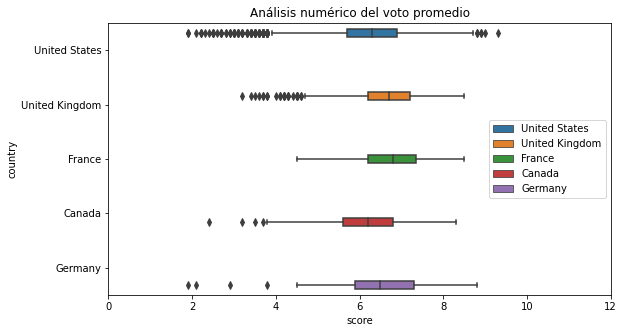

In [ ]:
columna='country'
cantidad=5

df,seleccionados=Data_importante(df_netflix,columna,cantidad)
fig, ax = plt.subplots(figsize = (9, 5))
sns.boxplot(data=df,x='score',y='country', hue='country',ax=ax)
plt.legend(loc='center right')
plt.xlim([0, 12])
plt.title("Análisis numérico del voto promedio")

Respecto al grafico anterior podemos observar:

*   las peliculas mejores valoradas en promedio son las de Francia (Promedio 7), sin mucha variabilidad obteniendo puntajes entre el rango de  5 puntos y 9 puntos.
*   Las peliculas de Estados Unidos poseen una gran variabilidad desde puntajes entre 2 y 9 como valores minimo y maximo respectivamente.
 

[Text(0.5, 1.0, 'Análisis del promedio de los votos en función \n del país de origen de la película')]

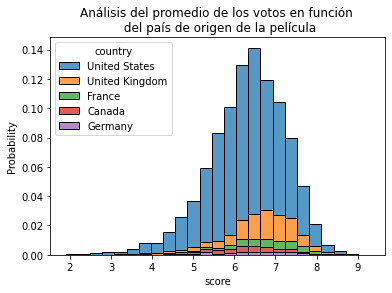

In [ ]:
columna='country'
cantidad=5 #Elegir los 5 paises con mas peliculas 

df,seleccionados=Data_importante(df_netflix,columna,cantidad)
sns.histplot(data=df, x="score", stat= "probability",  hue="country", multiple="stack",bins=25).set(title='Análisis del promedio de los votos en función \n del país de origen de la película')

Respecto al grafico anterior podemos observar:

*   La puntuacion de los votos de los diferentes paises siguen una distribucion normal (en Estados Unidos es donde mas se nota)
*   Las peliculas de Estados Unidos poseen un maximo de probabilidad de 0.175 ubicado en 6.5 puntos con un valor minimo de 2.5 y un valor maximo de 9.
*   El valor donde mas se acumulan las puntuaciones es 6.5
*   Las peliculas en general de todos los paises reciben puntaciones entre 5 y 8.
*   La mayor cantidad de peliculas es procedente de Estados Unidos seguido por United Kingdom


Text(0, 0.5, 'Duración  //  min')

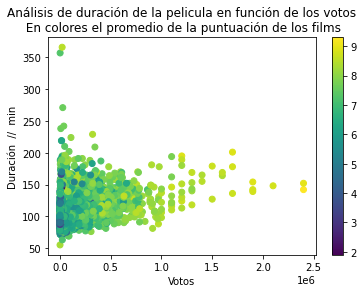

In [ ]:
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df_netflix['votes'], df_netflix['runtime'], c=df_netflix['score'])
fig.colorbar(mapeo_colores)
ax.set_title('Análisis de duración de la pelicula en función de los votos\n En colores el promedio de la puntuación de los films')
ax.set_xlabel('Votos')
ax.set_ylabel('Duración  //  min')

Respecto al grafico anterior podemos observar:

*   Las peliculas poseen una duracion entre 50 y 350 minutos. El valor de duracion mas votado es de 150 minutos.
*   Hay casos de peliculas muy bien valoradas que duran 350 minutos
*   Las peliculas en general de todos los paises reciben puntaciones entre 2 y 9. El promedio es 4 puntos durando 150 minutos

Text(0.5, 1.0, 'Influencia de la duracción de la película en el voto promedio')

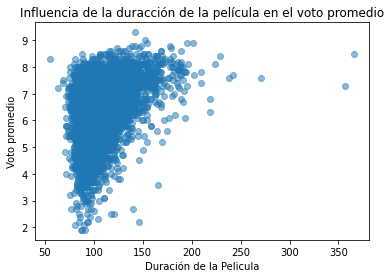

In [ ]:
#Ejemplo de un análisis Bivariado
fig, ax = plt.subplots()
ax.scatter( df_netflix['runtime'],df_netflix['score'], alpha=0.5)
ax.set_ylabel('Voto promedio')
ax.set_xlabel('Duración de la Pelicula')
ax.set_title('Influencia de la duracción de la película en el voto promedio')

Del análisis de esta grafica se puede infirir que la mayoria de películas  tienen un rango de duración de 50 a 150 minutos y reciben en mayor parte, una calificación  promedio entre 6 y 8.5, adicionalmente, se observa que, aunque muy pocos directores se arriesgan con películas de más 200 minutos, todas han obtenido una muy buena puntuación, se puede inferir que esto de debe a que una larga duración implica un mayor presupuesto y un mayor desarrollo de los personajes lo que se traduce en una película de mejor calidad. 

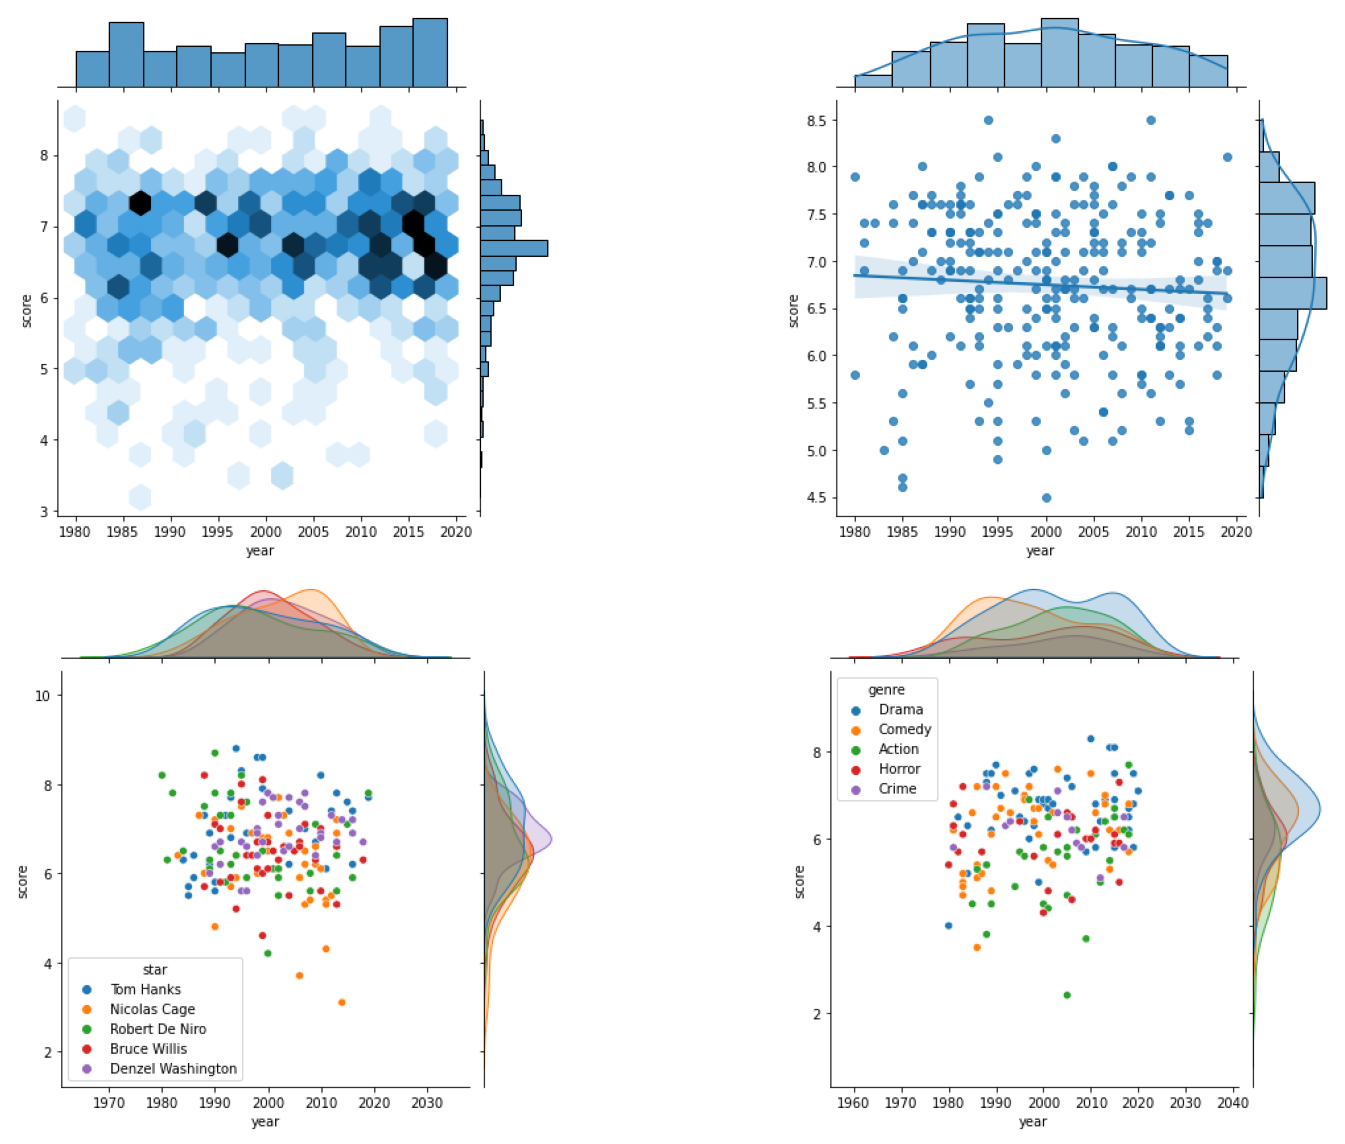

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# data
columna='country'
cantidad=5
df,seleccionados=Data_importante(df_netflix,columna,cantidad)

############### 1. CREATE PLOTS
df_part=df.query("{0} == @seleccionados[1]".format(columna))
g0 = sns.jointplot(data=df_part, x='year', y='score', kind="hex")

df_part=df.query("{0} == @seleccionados[2]".format(columna))
g1 = sns.jointplot(data=df_part, x='year', y='score', kind="reg")

df_part=df.query("{0} == @seleccionados[3]".format(columna))

filtro2='genre'
cant=5
df_2filtros,seleccionados_2filtro=Data_importante(df_part,filtro2,cant)
g2 = sns.jointplot(data=df_2filtros, x='year', y='score',hue="genre")

df_part=df.query("{0} == @seleccionados[0]".format(columna))
filtro2='star'
cant=5
df_2filtros,seleccionados_2filtro=Data_importante(df_part,filtro2,cant)
g3 = sns.jointplot(data=df_2filtros, x='year', y='score',hue="star")
############### 2. SAVE PLOTS IN MEMORY TEMPORALLY
g0.savefig('g0.png')
plt.close(g0.fig)
g1.savefig('g1.png')
plt.close(g1.fig)
g2.savefig('g2.png')
plt.close(g2.fig)
g3.savefig('g3.png')
plt.close(g3.fig)
############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(2, 2, figsize=(25, 16))
axarr[0,0].imshow(mpimg.imread('g0.png'))
axarr[0,1].imshow(mpimg.imread('g1.png'))
axarr[1,0].imshow(mpimg.imread('g3.png'))
axarr[1,1].imshow(mpimg.imread('g2.png'))
# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()
plt.show()

En las siguientes cuatro gráficas, se puede observar el puntaje de las películas a lo largo de los años hasta el 2021 acompañadas de histogramas que evidencia la distribución de estas películas a lo largo de los años y la distribución de puntajes dados para cada una de estas películas. 

[1,1] esta grafica muestra el puntaje de las películas creadas en el Reino Unido en función del tiempo, se puede observar que entre los años 2010 y 2020 es cuando más películas se produjeron en este país debido a los avances tecnológicos obtenidos. Adicionalmente, en el año 1985, también se destaca un porcentaje de producción de películas alto, a que esta época fue de "crisis y renacimiento británico" . En donde se impulsó a varios canales nacionales en la producción cinematográfica, se despertó una nueva generación de actores y directores de cine. 

[1,2] En la segunda grafica se identifican las películas producidas a lo largo de los años con su puntaje del país de Francia, adicionalmente se realizó una regresión que como se puede observar, aunque la dispersión de los resultados sea muy débil se puede identificar una leve inclinación negativa que nos muestra que con el paso de los años poco a poco ha ido disminuyendo la producción cinematográfica en Francia.

[2,1] en la tercera gráfica, además de observar la producción de películas a lo largo de los años y su respectiva puntuación de Canadá, se puede observar que las películas protagonizadas por Tom Hanks y Robert de Niro, obtuvieron las mejores puntuaciones, adicionalmente, la mayor producción de películas se realizó en los años 2000 y 2010 protagonizadas en su mayoría por los actores Brunce Willis, Denzek Washintong y Nicolas Cage.

[2,2] Finalmente esta grafica correspondiente a Estados unidos muestra como el género drama ha sido producido mayoritariamente y calificado de mejor manera por un tiempo prolongado, desde los años 90's hasta la actualidad, también se puede observar como el género de horror, aunque ha obtenido buenos puntajes no la logrado que se produzcan más películas de este género.


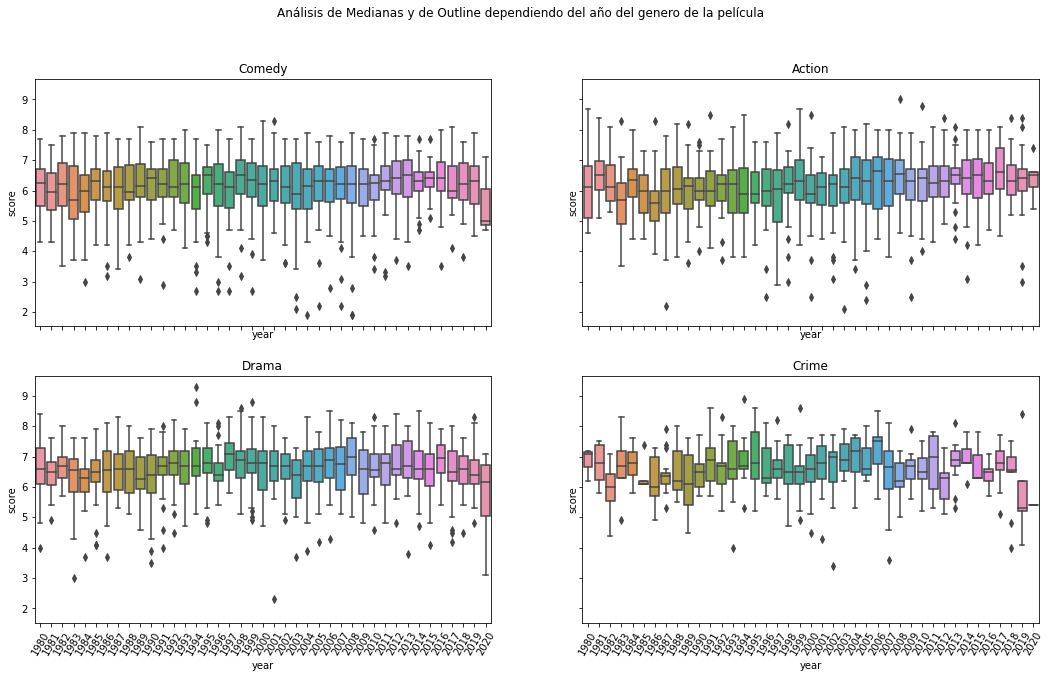

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10), sharex=True, sharey=True)
fig.suptitle('Análisis de Medianas y de Outline dependiendo del año del genero de la película')

columna='country'
cantidad=5
df,seleccionados=Data_importante(df_netflix,columna,cantidad)
#grafico1
df_part=df.query("{0} == @seleccionados[0]".format(columna) )
filtro2='genre'
cant=6
df_2filtros,seleccionados_2filtro=Data_importante(df_part,filtro2,cant)
df_2filtro_part=df.query("{0} == @seleccionados_2filtro[0]".format(filtro2))
titlee=seleccionados_2filtro[0]
sns.boxplot(ax=axes[0, 0], data=df_2filtro_part, x='year', y='score').set(title=titlee)
plt.xticks(rotation=45)
#grafico2
filtro2='genre'
cant=6
df_2filtros,seleccionados_2filtro=Data_importante(df_part,filtro2,cant)
df_2filtro_part=df.query("{0} == @seleccionados_2filtro[1]".format(filtro2))
titlee=seleccionados_2filtro[1]
sns.boxplot(ax=axes[0, 1], data=df_2filtro_part, x='year', y='score').set(title=titlee)
plt.xticks(rotation=45)
#grafico3
filtro2='genre'
cant=6
df_2filtros,seleccionados_2filtro=Data_importante(df_part,filtro2,cant)
df_2filtro_part=df.query("{0} == @seleccionados_2filtro[2]".format(filtro2))
titlee=seleccionados_2filtro[2]
sns.boxplot(ax=axes[1, 0], data=df_2filtro_part, x='year', y='score').set(title=titlee)
#grafico4
filtro2='genre'
cant=6
df_2filtros,seleccionados_2filtro=Data_importante(df_part,filtro2,cant)
df_2filtro_part=df.query("{0} == @seleccionados_2filtro[3]".format(filtro2))
titlee=seleccionados_2filtro[3]
sns.boxplot(ax=axes[1, 1], data=df_2filtro_part, x='year', y='score').set(title=titlee,)
axes[1,1].tick_params(axis='x', rotation=60)
axes[1,0].tick_params(axis='x', rotation=60)

Estas graficas nos presentan los géneros de películas producidos durante los años (comedia, acción, drama y crimen), evidenciando que el género de comedia es el menos valorado y el género de drama en mejor valorado de los cuatro, también se puede observar que en el año 2020 todos los géneros tuvieron un descenso en su puntuación infiriendo que es un efecto dado por la pandemia que tuvo lugar en este año, el género drama en este año se destacó por tener las peores puntuaciones llegando casi al 3, las producciones de crimen también se destacan, ya que mantienen unas muy buenas puntuaciones y además tienen muy pocas calificaciones bajas, se puede observar que sus puntuaciones más bajas oscilan entre 2.5 y 3.


In [ ]:
de_que='score' #columna sobre la que se va a calcular la mediana
sobre='genre'  #serie sobre la que se quiere comparar la mediana

tamaño=np.shape(df_netflix[sobre].unique())[0]
df_ordenado,seleccionados=Data_importante(df_netflix,sobre,tamaño)
Promedios = promedio_df(df_ordenado,de_que,sobre,seleccionados)
print("Los años que se van a analizar son:")
print(Promedios.shape[0])
print("Analisis de NaN en los datos obtenidos")
print(Promedios.isna().sum())




Los años que se van a analizar son:
41
Analisis de NaN en los datos obtenidos
Comedy        0
Action        0
Drama         0
Crime         0
Biography     1
Adventure     0
Animation     0
Horror        0
Fantasy      14
Mystery      25
Thriller     29
Family       32
Sci-Fi       33
Romance      32
Western      38
Musical      40
Music        40
History      40
Sport        40
dtype: int64


Debido a que en el análisis anterior, arroja varios generos con muchos NaN. Se analizaron hasta el género Horror. Donde el único NaN que sobrevive, se cambiara por el promedio de todos los datos de ese género.

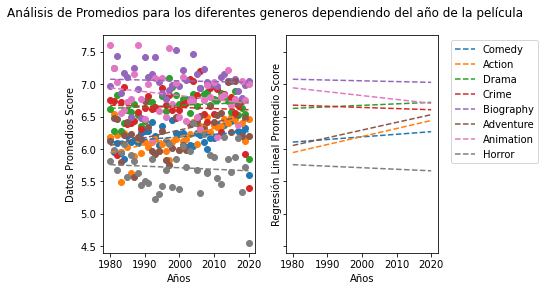

In [ ]:
de_que='score' #columna sobre la que se va a calcular la mediana
sobre='genre'  #serie sobre la que se quiere comparar la mediana
tamaño=8

df_ordenado,seleccionados=Data_importante(df_netflix,sobre,tamaño)
Promedios = promedio_df(df_ordenado,de_que,sobre,seleccionados)
Promedios.fillna(Promedios['Biography'].mean(), inplace=True)


# Set figure default figure size
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.suptitle('Análisis de Promedios para los diferentes generos dependiendo del año de la película')
ax1.set_xlabel('Años')
ax1.set_ylabel('Datos Promedios Score')
ax2.set_xlabel('Años')
ax2.set_ylabel('Regresión Lineal Promedio Score')  
for i in seleccionados:
  ax1.scatter(x=Promedios.index,y=Promedios[i])

  b = estimate_coef(Promedios.index, Promedios[i])
  y_pred = b[0] + b[1]*Promedios.index
  ax1.plot(Promedios.index,y_pred, ls="--",label=i)
  ax2.plot(Promedios.index,y_pred, ls="--",label=i)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

En esta grafica se evidencian los puntajes que han tenido cada uno de los géneros a lo largo de los años con su respectiva regresión, se puede observar que el género de mayor puntaje es biografías ya que su puntaje promedio supera los 7 puntos, se puede observar también que hay un decrecimiento en los géneros de animación, crimen y terror, siendo este último el que menos puntaje tiene con respecto a los demás géneros manteniendo un promedio menor a los 6 puntos, finalmente se destaca que los géneros de acción y aventura han mejorado su calificación a través de los años notoriamente aunque su puntuación actual sigue estando en la media.


# Limpieza de los datos y prueba del modelo con respecto a gross como target


In [ ]:
# limpieza de los NaN de la columna target
#data_limpio = df_netflix[df_netflix['gross'].notna()] #Limpieza de los NaN en nunestro target
data_limpio = df_netflix.dropna() #Limpieza de los NaN en nunestro target
data_limpio = data_limpio.drop("released", axis=1)
data_limpio.isna().sum() # Verificación de que no tenemos NaN en el target
data_limpio.shape

(5421, 14)

In [ ]:
# Datos numéricos pasados a flotantes 
data_limpio['year']    = data_limpio['year'].astype(float)
data_limpio['gross']   = data_limpio['gross'].astype(float)
data_limpio['score']   = data_limpio['score'].astype(float)
data_limpio['votes']   = data_limpio['votes'].astype(float)
data_limpio['budget']  = data_limpio['budget'].astype(float)
data_limpio['runtime'] = data_limpio['runtime'].astype(float)
# Datos categoricos pasados a numeros
data_limpio['name']     = data_limpio['name'].astype('category')
data_limpio['rating']   = data_limpio['rating'].astype('category')
data_limpio['genre']    = data_limpio['genre'].astype('category')
data_limpio['director'] = data_limpio['director'].astype('category')
data_limpio['writer']   = data_limpio['writer'].astype('category')
data_limpio['star']     = data_limpio['star'].astype('category')
data_limpio['country']  = data_limpio['country'].astype('category')
data_limpio['company']  = data_limpio['company'].astype('category')
# Assigning numerical values and storing in another column
data_limpio['name']     = data_limpio['name'].cat.codes
data_limpio['rating']   = data_limpio['rating'].cat.codes
data_limpio['genre']    = data_limpio['genre'].cat.codes
data_limpio['director'] = data_limpio['director'].cat.codes
data_limpio['writer']   = data_limpio['writer'].cat.codes
data_limpio['star']     = data_limpio['star'].cat.codes
data_limpio['country']  = data_limpio['country'].cat.codes
data_limpio['company']  = data_limpio['company'].cat.codes

## Disminución de la dimensión del DataSet

In [ ]:
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist() # pone los nombre de las columnas en una lista
    best_features = [] # Habre una lista vacia que usara despues
    while (len(initial_features)>0): # hace un while mientras el tamaño de las columnas sea mayor a cero
        remaining_features = list(set(initial_features)-set(best_features)) # resta conjuntos los iniciales menos los mejores
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit() # hace un nuevo data con una columna const (1.0) y la nueva columna para fitear
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

def backward_elimination(data, target,significance_level = 0.01):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

def stepwise_selection(data, target,SL_in=0.01,SL_out = 0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features



### Forward selection

Para seleccionar las columnas que mas aportan al target elegimos el método Forward selection. El cual comenzamos con un modelo nulo y luego comenzamos a ajustar el modelo con cada característica individual una a la vez y seleccionamos la característica con el valor p mínimo. Ahora ajuste un modelo con dos características probando combinaciones de la característica seleccionada anteriormente con todas las demás características restantes. Vuelva a seleccionar la función con el valor p mínimo. y asi con las demas características.

En estadística general y contrastes de hipótesis, el valor p (conocido también como p, p-valor, valor de p consignado, o directamente en inglés p-value) se define como la probabilidad de que un valor estadístico calculado sea posible dada una hipótesis nula cierta. En términos simples, el valor p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos. \


Si el valor p cumple con la condición de ser menor que un nivel de significancia impuesto arbitrariamente, este se considera como un resultado estadísticamente significativo y, por lo tanto, permite rechazar la hipótesis nula.


In [ ]:
X = data_limpio.drop("gross", axis=1)       # feature matrix
y = data_limpio['gross']               # target feature
imp_forward_selection=forward_selection(X,y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a fut

In [ ]:
imp_forward_selection

['votes', 'budget', 'rating', 'runtime', 'genre', 'score']

Para utilizar el método forward_selection se borraron los datos NaN. Ademas la columna released fue eliminada. Las columnas numéricas fueron transformadas a Float y las categoricas a traves de Label Encoder se convirtieron a números.

### Backward selection

En la eliminación hacia atrás, comenzamos con el modelo completo (incluidas todas las variables independientes) y luego eliminamos la característica insignificante con el valor p más alto (> nivel de significancia). Este proceso se repite una y otra vez hasta que tenemos el conjunto final de características importantes.

In [ ]:
X = data_limpio.drop("gross", axis=1)       # feature matrix
y = data_limpio['gross']               # target feature
imp_backward_elimination=backward_elimination(X,y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

In [ ]:
imp_backward_elimination

['rating', 'genre', 'score', 'votes', 'budget', 'runtime']

### Eliminación bidireccional (stepwise)

Es similar a la selección hacia adelante, pero la diferencia es que al agregar una nueva característica, también verifica la importancia de las características ya agregadas y si encuentra que alguna de las características ya seleccionadas es insignificante, simplemente elimina esa característica en particular mediante la eliminación hacia atrás.

Por lo tanto, es una combinación de selección hacia adelante y eliminación hacia atrás.

In [ ]:
X = data_limpio.drop("gross", axis=1)       # feature matrix
y = data_limpio['gross']               # target feature
imp_stepwise_selection=stepwise_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a futur

In [ ]:
imp_stepwise_selection

['votes', 'budget', 'rating', 'runtime', 'genre', 'score']

## Regresión Lineal

Método utilizado en ML para el target *gross* utilizando forward selección para disminuir la dimensión del data set.

In [ ]:
Data_para_ML=data_limpio[imp_forward_selection]
X = Data_para_ML   # feature matrix
y = data_limpio['gross']               # target feature
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("r2 " ,r2_score(y_test,y_pred))

MAE 56530116.61454515
MSE 1.2220068238343686e+16
r2  0.6900335872517309


Método utilizado en ML para el target *gross* utilizando backward selección para disminuir la dimensión del data set.



In [ ]:
Data_para_ML=data_limpio[imp_backward_elimination]
X = Data_para_ML   # feature matrix
y = data_limpio['gross']               # target feature
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("r2 " ,r2_score(y_test,y_pred))

MAE 56530116.61409155
MSE 1.2220068238044306e+16
r2  0.6900335872593248


Método utilizado en ML para el target *gross* utilizando stepwise selection para disminuir la dimensión del data set.

In [ ]:
Data_para_ML=data_limpio[imp_stepwise_selection]
X = Data_para_ML   # feature matrix
y = data_limpio['gross']               # target feature
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("r2 " ,r2_score(y_test,y_pred))

MAE 56530116.61454515
MSE 1.2220068238343686e+16
r2  0.6900335872517309


## Análisis Underfitting y Overfitting

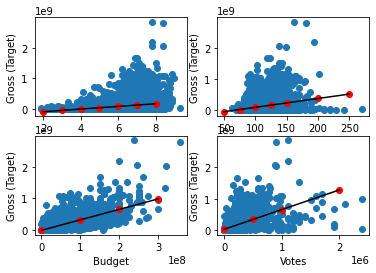

In [ ]:
#regresión entre score vs gross(target)
regresion = linear_model.LinearRegression()

# Grafico

plt.subplot(2, 2, 1)
modelo_score = regresion.fit(data_limpio["score"].values.reshape((-1, 1)),data_limpio["gross"])
entrada_score = [[2],[3],[4],[5],[6],[7],[8]]
plt.ylabel("Gross (Target)")
plt.xlabel("Score")
plt.scatter(data_limpio["score"],data_limpio["gross"])
plt.scatter(entrada_score,modelo_score.predict(entrada_score), color="red")
plt.plot(entrada_score,modelo_score.predict(entrada_score), color="black")

plt.subplot(2, 2, 2)
modelo_runtime = regresion.fit(data_limpio["runtime"].values.reshape((-1, 1)),data_limpio["gross"])
entrada_runtime = [[50],[75],[100],[125],[150],[200],[250]]
plt.ylabel("Gross (Target)")
plt.xlabel("Runtime")
plt.scatter(data_limpio["runtime"],data_limpio["gross"])
plt.scatter(entrada_runtime,modelo_runtime.predict(entrada_runtime), color="red")
plt.plot(entrada_runtime,modelo_runtime.predict(entrada_runtime), color="black")

plt.subplot(2, 2, 3)
modelo_budget = regresion.fit(data_limpio["budget"].values.reshape((-1, 1)),data_limpio["gross"])
entrada_budget = [[0],[1e8],[2e8],[3e8]]
plt.ylabel("Gross (Target)")
plt.xlabel("Budget")
plt.scatter(data_limpio["budget"],data_limpio["gross"])
plt.scatter(entrada_budget,modelo_budget.predict(entrada_budget), color="red")
plt.plot(entrada_budget,modelo_budget.predict(entrada_budget), color="black")

plt.subplot(2, 2, 4)
modelo_votes = regresion.fit(data_limpio["votes"].values.reshape((-1, 1)),data_limpio["gross"])
entrada_votes = [[0],[0.5e6],[1e6],[2e6]]
plt.ylabel("Gross (Target)")
plt.xlabel("Votes")
plt.scatter(data_limpio["votes"],data_limpio["gross"])
plt.scatter(entrada_votes,modelo_votes.predict(entrada_votes), color="red")
plt.plot(entrada_votes,modelo_votes.predict(entrada_votes), color="black")


plt.show()

## Conclusión

A partir de los métodos de disminución de la dimensión del data set, obtenemos las mismas caracteristicas, por lo cual, las métricas de evaluciaón del ML da igual

En el análisis de Underfitting y Overfitting podemos ver que el método presenta underfitting debido a que los gráficos no son bien descriptos por el modelo

# Prueba del modelo con respecto al presupuesto (budget)

## Forward Feature Selection

In [ ]:
# aplicamos forward selection

X = data_limpio.drop("budget", axis=1)       # feature matrix
y = data_limpio["budget"]               # target feature
imp_forward_selection=forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a fut

In [ ]:
imp_forward_selection

['gross', 'genre', 'year', 'runtime', 'score', 'rating', 'company', 'country']

## Backward selection

In [ ]:
X = data_limpio.drop("budget", axis=1)       # feature matrix
y = data_limpio['budget']               # target feature
imp_backward_elimination=backward_elimination(X,y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

In [ ]:
imp_backward_elimination

['rating', 'genre', 'year', 'score', 'country', 'gross', 'company', 'runtime']

## Eliminación bidireccional (stepwise)

In [ ]:
X = data_limpio.drop("budget", axis=1)       # feature matrix
y = data_limpio['budget']               # target feature
imp_stepwise_selection=stepwise_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a futur

In [ ]:
imp_stepwise_selection

['gross', 'genre', 'year', 'runtime', 'score', 'rating', 'company', 'country']

## Separacion de datos

### 80% entrenamiento 20% prueba

In [ ]:
resto, prueba, resto_clase, prueba_clase = train_test_split(
    data_limpio[["rating","genre","year","score","gross","runtime"]],
    data_limpio["budget"],
    test_size=0.20) 
resto

,rating,genre,year,score,gross,runtime
2481,5,4,1994.0,6.6,33351557.0,99.0
1517,6,0,1989.0,5.8,15942628.0,108.0
2175,6,6,1992.0,6.6,1100218.0,95.0
5056,6,3,2007.0,7.8,269755430.0,157.0
1417,5,4,1988.0,5.7,5509417.0,97.0
...,...,...,...,...,...,...
3412,6,5,1998.0,5.7,1677131.0,114.0
6899,5,0,2016.0,5.4,150680864.0,127.0
6094,6,4,2012.0,6.6,102731865.0,88.0
5585,5,4,2009.0,7.1,36020534.0,93.0


## El modelo que utilizaremos es Regresion Lineal

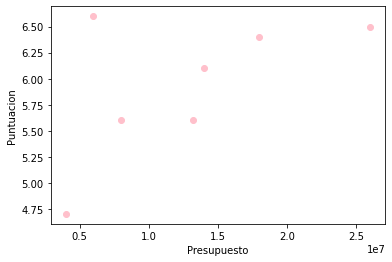

In [ ]:
# solo analizaremos el genero "Thriller"
df=df_netflix.dropna()
Thriller = df.loc[df['genre']=='Thriller']

plt.ylabel("Puntuacion")
plt.xlabel("Presupuesto")
plt.scatter(Thriller["budget"],Thriller["score"],color="pink")
plt.show()

## Creacion de Modelo de Regresion lineal simple

Ordenada al origen (b) 5.2763894337648765
Pendiente (m) [5.11802014e-08]


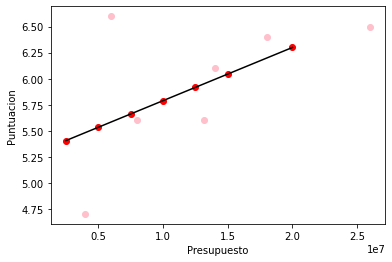

In [ ]:
regresion = linear_model.LinearRegression()

budget = Thriller["budget"].values.reshape((-1, 1))

modelo = regresion.fit(budget, Thriller["score"])

print("Ordenada al origen (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_) 

entrada = [[2500000],[5000000],[7500000],[10000000],[12500000],[15000000],[20000000]]
modelo.predict(entrada)

plt.scatter(entrada,modelo.predict(entrada), color="red")
plt.plot(entrada,modelo.predict(entrada), color="black")

plt.ylabel("Puntuacion")
plt.xlabel("Presupuesto")
plt.scatter(Thriller["budget"],Thriller["score"],color="pink")
plt.show()

Como se puede observar en el grafico se ha creado una recta de ordenada al origen de valor aproximado 5.27 y una pendiente de valor aproximado de 5.11802014e-08

## Calculo de metricas para validar el modelo y conclusiones

In [ ]:
# valor de error maximo
true = Thriller["budget"]
predicted = modelo.predict(entrada)
max_error(true, predicted)
print(max_error(true, predicted))

25999994.21180855


De acuerdo al valor obtenido de error maximo, podriamos concluir que no es un buen metodo la regresion lineal para nuestra desafio ya que da un error de 25999994 aproximadamente

In [ ]:
# error absoluto medio
true = Thriller["budget"]
predicted = modelo.predict(entrada)

print(mean_absolute_error(true, predicted))

12742851.336387051


De acuerdo al valor obetnido de error absoluto medio, podriamos concluir que no es un buen metodo la regresion lineal para nuestra desafio ya que da un error de 12742851 aproximadamente

In [ ]:
# r2 /// aca debe haber algun tema porque r2 no puede ser negativo...
true = Thriller["budget"]
predicted = modelo.predict(entrada)
r2_score(true, predicted)

-3.251533604295105

In [ ]:
# suma de los cuadrados de los residuos
true = Thriller["budget"]
predicted = modelo.predict(entrada)
mean_squared_error(true, predicted)

212319852878659.03

# Prueba del modelo con respecto a rating 

**Metricas algoritmos de clasificacion**

In [ ]:
#Cargar Data Set 
#print(df_netflix['rating'].unique())
#scale_mapper = {"nan":0, "Not Rated":0, "Unrated":0,"G":1, "Approved":1, "TV-PG":2, "TV-14":2,"PG":3, "PG-13":4, "R":5,"NC-17":5,"X":5,"TV-MA":5}
scale_mapper = {"nan":0, "Not Rated":0, "Unrated":0,"G":0, "Approved":0, "TV-PG":0, "TV-14":0,"PG":0, "PG-13":0, "R":1,"NC-17":1,"X":1,"TV-MA":1}
df_netflix["rating"] = df_netflix["rating"].replace(scale_mapper)
X= df_netflix.drop(columns = ["rating", "name","genre", "released","director", "writer","star", "country","company"]) # feature matrix
X= X.fillna (0)
X= X.astype('float')

Y = df_netflix ['rating']              # target feature
Y= Y.fillna (0)
Y= Y.astype('float')







In [ ]:
datos_seleccion=forward_selection(X,Y);


In [ ]:
datos_seleccion


['budget', 'votes', 'gross', 'runtime']

In [ ]:
Data_para_ML=X[datos_seleccion]
X = Data_para_ML   # feature matrix
y = Y

# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

Se utilizó un método Forward selection para el *"feature selection"*, también se tuvo en cuenta que se tomaron como valores **positivos** las películas que solo fueran permitidas para mayores de edad, y **negativos** las películas aptas para todo público, con el fin de realizar el ejercicio y conocer el funcionamiento de ambas métricas

##**Matriz de confusión**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

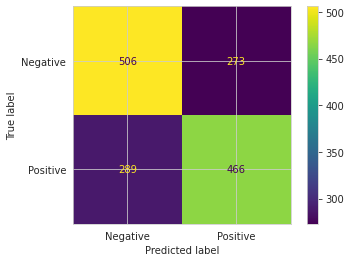

In [ ]:
sns.set_style('whitegrid')
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=3)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

## **Métricas para evaluación de clasificadores**


In [ ]:
confusion = metrics.confusion_matrix(y_test, preds) # valores de la matriz de confusión 
confusion.ravel()

array([506, 273, 289, 466])

In [ ]:
#La Exactitud o Accuracy
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.6336375488917861

El 63 % total de elementos fueron clasificados correctamente clasificados correctamente.

In [ ]:
# Precision se evalua para cada categoria
precision_Mayores = metrics.precision_score(y_test, preds, pos_label=1)
precision_Todos = metrics.precision_score(y_test, preds, pos_label=0)
precision_Mayores, precision_Todos 

(0.6305818673883626, 0.6364779874213836)

Se puede observar que la dispersión de los valores es muy alta, por lo que se dificulta obtener un porcentaje de precisión alto.

Se logró un 63% de casos positivos detectados en películas para mayores y un 63.7% para casos positivos para películas para todo publico  




In [ ]:
#Sensibilidad o Tasa de Verdaderos Positivos
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.6172185430463576, 0.6495507060333762)

la capacidad que tiene el algoritmo para identificar peliculas para adultos es del 61%  (Verdaderos positivos)y la capacidad que tiene el algoritmo para encontar peliculas para todo publico es del 64% que serian nuestros (verdaderos negativos)

In [ ]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo 

(0.6238286479250335, 0.6429479034307497)

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.64      0.65      0.64       779
         1.0       0.63      0.62      0.62       755

    accuracy                           0.63      1534
   macro avg       0.63      0.63      0.63      1534
weighted avg       0.63      0.63      0.63      1534



##**Conclusión** 

Para este caso de métricas para algoritmos de clasificación, se puede decir que el modelo es Underfitting ya que existen mucha dispersión en los valores lo que produce que el algoritmo no reproduzca una barrera correcta entre las clases, y por ende, las métricas den como resultado porcentajes bajos